In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
fear_df = pd.read_csv("../data/fear_df.csv")

In [5]:
fear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240374 entries, 0 to 240373
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        240374 non-null  object
 1   label       240374 non-null  int64 
 2   label_name  240374 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.5+ MB


In [27]:
train_df, valid_df = train_test_split(
                fear_df,
                test_size=0.2,
                random_state=88,
                stratify=fear_df["label"],
            )

valid_df, test_df = train_test_split(
                valid_df,
                test_size=0.5,
                random_state=88,
                stratify=valid_df["label"],
            )

# Reset the indices of the resulting DataFrames
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192299 entries, 0 to 192298
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        192299 non-null  object
 1   label       192299 non-null  int64 
 2   label_name  192299 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.4+ MB


<Axes: xlabel='label_name', ylabel='count'>

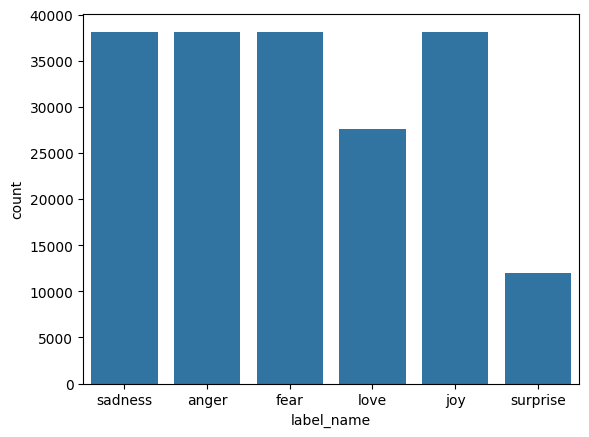

In [30]:
sns.countplot(x="label_name" ,data=train_df)

<Axes: xlabel='label_name', ylabel='count'>

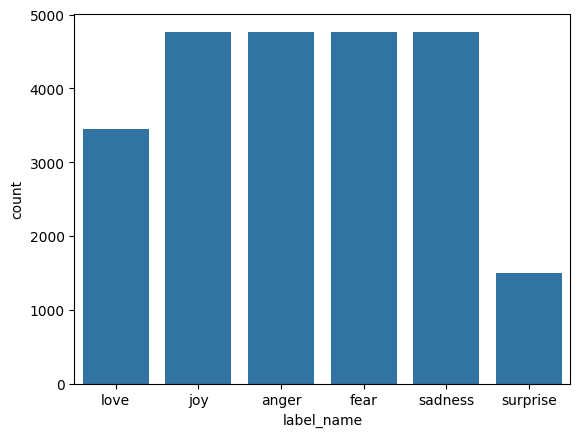

In [13]:
sns.countplot(x="label_name" ,data=valid_df)

<Axes: xlabel='label_name', ylabel='count'>

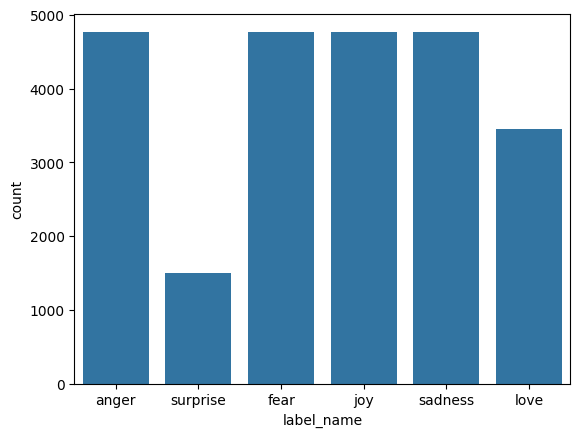

In [14]:
sns.countplot(x="label_name" ,data=test_df)

In [21]:
from transformers import BertTokenizer

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example text
text = "I am feeling very happy today!"

# Tokenize the text
inputs = tokenizer(text, return_tensors='pt', padding='max_length', truncation=True)

# Show tokenized input
print(inputs['input_ids'].shape)

torch.Size([1, 512])


In [36]:
train_df_1 = train_df.copy()

# train_df_1.loc[0, 'text'], len(train_df_1.loc[0, 'text'].split())
train_df_1['length'] = train_df_1['text'].map(lambda sentence: len(sentence.split()))

train_df_1.head()

,text,label,label_name,length
0,i feel bad for her but i a href http lolhunt,0,sadness,11
1,i feel it has only been agitated by the presen...,3,anger,13
2,i feel restless like i need to continue moving,4,fear,9
3,i feel dirty trackbackping http www,0,sadness,6
4,i just feel i must be supportive of my kitty,2,love,10


In [37]:
train_df_1["length"].max()

110

In [38]:
test_df_1 = test_df.copy()

test_df_1['length'] = test_df_1['text'].map(lambda sentence: len(sentence.split()))

test_df_1["length"].max()

74

In [39]:
valid_df_1 = valid_df.copy()

valid_df_1['length'] = valid_df_1['text'].map(lambda sentence: len(sentence.split()))

valid_df_1["length"].max()

178

In [41]:
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

In [43]:
import torch
train_dataset = torch.utils.data.TensorDataset(
    train_encodings['input_ids'], 
    train_encodings['attention_mask'], 
    torch.tensor(train_df['label'].tolist(),dtype=torch.float64)
    )

In [44]:
len(train_dataset)

192299

In [46]:
data, mask, label = train_dataset[0]

data.shape, mask.shape

(torch.Size([121]), torch.Size([121]))